In [66]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold,train_test_split,KFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso, LinearRegression, Ridge

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.multiclass import OneVsRestClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

from catboost import Pool,CatBoostClassifier, CatBoostRegressor
import warnings

import shap
from pingouin import partial_corr

from sklearn.feature_selection import SelectKBest, chi2, f_classif

from math import pi

import lightgbm as lgb
import random

import operator
from functools import reduce

from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree
import graphviz
from dtreeviz.trees import dtreeviz

In [67]:
# import data
old_train = pd.read_csv("C:/Users/Meyke/WiDS/data/train.csv")
old_test = pd.read_csv("C:/Users/Meyke/WiDS/data/test.csv")

#
df = pd.read_csv("C:/Users/Meyke/WiDS/data/features_data_0402_imputed_star_rating_and_generous_building_id.csv")
df = df.set_index('id')

del df['Unnamed: 0']

#rename
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,calc_eui_perc_off,binned_calc_eui,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75,weather_cluster
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,-0.068208,10,10,0.856815,3,245.522877,241.135162,0,0,7
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,-0.016720,1,1,-0.209475,2,27.609132,39.559542,0,0,3
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,-0.102134,1,1,-0.218145,2,23.481589,100.965937,1,1,3
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,-0.155260,2,2,-0.104341,2,43.272466,69.441531,0,0,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,0.255951,1,1,-0.317939,2,5.196438,38.209399,1,1,7


In [68]:
df.isna().sum().sort_values(ascending=False)

site_eui              9705
year_factor              0
year_built               0
number_june              0
number_may               0
                      ... 
october_min_temp         0
september_max_temp       0
september_avg_temp       0
september_min_temp       0
weather_cluster          0
Length: 111, dtype: int64

In [69]:
old = old_train.append(old_test)

In [70]:
old.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [71]:
old = old.set_index('id')

In [72]:
df['direction_max_wind_speed'] = df.apply(lambda row: old.loc[row.name]['direction_max_wind_speed'], axis=1)
df['direction_peak_wind_speed'] = df.apply(lambda row: old.loc[row.name]['direction_peak_wind_speed'], axis=1)
df['max_wind_speed'] = df.apply(lambda row: old.loc[row.name]['max_wind_speed'], axis=1)
df['days_with_fog'] = df.apply(lambda row: old.loc[row.name]['days_with_fog'], axis=1)

In [73]:
df.isna().sum().sort_values(ascending=False)

days_with_fog                54913
direction_peak_wind_speed    50386
direction_max_wind_speed     49657
max_wind_speed               49657
site_eui                      9705
                             ...  
november_avg_temp                0
november_min_temp                0
october_max_temp                 0
october_avg_temp                 0
year_factor                      0
Length: 113, dtype: int64

## 1 impute new weather features

In [74]:
building_id_list = df['building_id'].unique()

### A. days_with_fog

In [75]:
import math

def impute_fog_2(row):
    if row.days_with_fog == row.days_with_fog:
        return row.days_with_fog
        
    else:
        # get value based on year and state
        B_id = row.building_id
        B_year = row.year_factor
        B_state = row.state_factor
        
        temp_df = df[(df['year_factor'] == B_year) & (df['state_factor'] == B_state)] 
        
        # list_fog is list of fog_days
        list_fog = temp_df['days_with_fog'].to_list()
        
        list_of_fog_notna = [i for i in list_fog if not math.isnan(i)]
        
        if len(list_of_fog_notna)>0:
            if min(list_of_fog_notna) == max(list_of_fog_notna):
                return min(list_of_fog_notna)
            else:
                return sum(list_of_fog_notna) / len(list_of_fog_notna)


In [76]:
df['days_with_fog'] = df.apply(impute_fog_2, axis=1)

In [77]:
df[df['days_with_fog'].isna()].groupby(['state_factor','year_factor'])['state_factor'].count()

state_factor  year_factor
State_1       6              1036
State_10      4                 4
State_11      5              3191
State_2       1                13
              2                14
              3               515
              5              1558
              7              1515
Name: state_factor, dtype: int64

In [78]:
def impute_fog(row):
    if row.days_with_fog == row.days_with_fog:
        return row.days_with_fog
    else:
        if row.state_factor == 'State_1':
            return (113+126) / 2
        elif row.state_factor == 'State_2':
            return (110+106) / 2
        elif row.state_factor == 'State_10':
            return (51+114+106+107) / 4
        elif row.state_factor == 'State_11':
            return 261

In [79]:
df['days_with_fog'] = df.apply(impute_fog, axis=1)

### B. direction_peak_wind

In [80]:
df['direction_peak_wind_speed'] = df.apply(lambda row: np.nan if row.direction_peak_wind_speed == 1 else row.direction_peak_wind_speed, axis=1)

In [81]:
def direction_peak_wind(row):
    if row.direction_peak_wind_speed == row.direction_peak_wind_speed:
        return row.direction_peak_wind_speed
        
    else:
        # get value based on year and state
        B_id = row.building_id
        B_year = row.year_factor
        B_state = row.state_factor
        
        temp_df = df[(df['year_factor'] == B_year) & (df['state_factor'] == B_state)] 
        
        # list_fog is list of fog_days
        list_fog = temp_df['direction_peak_wind_speed'].to_list()
        
        list_of_fog_notna = [i for i in list_fog if not math.isnan(i)]
        
        if len(list_of_fog_notna)>0:
            if min(list_of_fog_notna) == max(list_of_fog_notna):
                return min(list_of_fog_notna)
            else:
                temp_df_2 = df[(df['year_factor'] == B_year) & (df['building_id'] == B_id)] 
                # list_fog is list of fog_days
                list_fog_2 = temp_df['direction_peak_wind_speed'].to_list()
                
                list_of_fog_notna_2 = [i for i in list_fog_2 if not math.isnan(i)]
                
                if len(list_of_fog_notna_2)>0:
                    if min(list_of_fog_notna_2) == max(list_of_fog_notna_2):
                        return min(list_of_fog_notna_2)
                
                else:
                    return sum(list_of_fog_notna) / len(list_of_fog_notna)


In [82]:
df['direction_peak_wind_speed'] = df.apply(direction_peak_wind, axis=1)

### C. cat_direction_peak_wind

### D. direction_max_wind_speed

In [85]:
df['direction_max_wind_speed'] = df.apply(lambda row: np.nan if row.direction_max_wind_speed == 1 else row.direction_max_wind_speed, axis=1)

In [86]:
def direction_max_wind(row):
    if row.direction_max_wind_speed == row.direction_max_wind_speed:
        return row.direction_max_wind_speed
        
    else:
        # get value based on year and state
        B_id = row.building_id
        B_year = row.year_factor
        B_state = row.state_factor
        
        temp_df = df[(df['year_factor'] == B_year) & (df['state_factor'] == B_state)] 
        
        # list_fog is list of fog_days
        list_fog = temp_df['direction_max_wind_speed'].to_list()
        
        list_of_fog_notna = [i for i in list_fog if not math.isnan(i)]
        
        if len(list_of_fog_notna)>0:
            if min(list_of_fog_notna) == max(list_of_fog_notna):
                return min(list_of_fog_notna)
            else:
                temp_df_2 = df[(df['year_factor'] == B_year) & (df['building_id'] == B_id)] 
                # list_fog is list of fog_days
                list_fog_2 = temp_df['direction_max_wind_speed'].to_list()
                
                list_of_fog_notna_2 = [i for i in list_fog_2 if not math.isnan(i)]
                
                if len(list_of_fog_notna_2)>0:
                    if min(list_of_fog_notna_2) == max(list_of_fog_notna_2):
                        return min(list_of_fog_notna_2)
                
                else:
                    return sum(list_of_fog_notna) / len(list_of_fog_notna)

In [87]:
df['direction_max_wind_speed'] = df.apply(direction_max_wind, axis=1)

In [88]:
def impute_max_wind_speed(row):
    if row.direction_max_wind_speed == row.direction_max_wind_speed:
        return row.direction_max_wind_speed
    else:
        if row.state_factor == 'State_1':
            return (310+280) / 2
        elif row.state_factor == 'State_10':
            return (350+360+360) / 3
        elif row.state_factor == 'State_11':
            return 297.832817
        elif row.state_factor == 'State_2':
            return (312.76 + 327.87) / 2
        elif row.state_factor == 'State_6':
            return (312.76 + 327.87) / 2
        elif row.state_factor == 'State_8':
            return (350+320+329.2) / 3
        elif row.state_factor == 'State_4':
            return 330

In [89]:
df['imputed_max_wind_direction'] = df.apply(impute_max_wind_speed, axis=1)

In [90]:
df.isna().sum().sort_values(ascending=False)

cat_direction_peak_wind       73706
direction_peak_wind_speed     73706
direction_max_wind_speed      73002
max_wind_speed                49657
site_eui                       9705
                              ...  
october_avg_temp                  0
october_min_temp                  0
september_max_temp                0
september_avg_temp                0
imputed_max_wind_direction        0
Length: 115, dtype: int64

### E. cat_direction_max_wind_speed

### F. max_wind_speed

In [95]:
df['max_wind_speed'] = df.apply(lambda row: np.nan if row.max_wind_speed == 1 else row.max_wind_speed, axis=1)

In [96]:
def max_wind_speed2(row):
    if row.max_wind_speed == row.max_wind_speed:
        return row.max_wind_speed
        
    else:
        # get value based on year and state
        B_id = row.building_id
        B_year = row.year_factor
        B_state = row.state_factor
        
        temp_df = df[(df['year_factor'] == B_year) & (df['state_factor'] == B_state)] 
        
        # list_fog is list of fog_days
        list_fog = temp_df['max_wind_speed'].to_list()
        
        list_of_fog_notna = [i for i in list_fog if not math.isnan(i)]
        
        if len(list_of_fog_notna)>0:
            if min(list_of_fog_notna) == max(list_of_fog_notna):
                return min(list_of_fog_notna)
            else:
                return sum(list_of_fog_notna) / len(list_of_fog_notna)

In [97]:
df['max_wind_speed'] = df.apply(max_wind_speed2, axis=1)

In [98]:
def impute_max_wind_speed(row):
    if row.max_wind_speed == row.max_wind_speed:
        return row.max_wind_speed
    else:
        if row.state_factor == 'State_1':
            if row.year_factor == 6:
                return (17+22)/2
            elif row.year_factor == 4:
                return (17+15)/2
            elif row.year_factor == 6:
                return (17+22+15)/3
        elif row.state_factor == 'State_10':
            if row.year_factor == 4:
                return (20.6+19.2)/2
            elif row.year_factor == 6:
                return (19.2+23.3)/2
        elif row.state_factor == 'State_11':
            return 15.489
        elif row.state_factor == 'State_2':
            return (14.4+16.98)/2
        elif row.state_factor == 'State_4':
            return (17.4+19.52) /2
        elif row.state_factor == 'State_6':
            return (14.4+16.98)/2
        elif row.state_factor == 'State_8':
            return (18.3+23.3+27.86)/3

In [99]:
df['max_wind_speed_imputed'] = df.apply(impute_max_wind_speed, axis=1)

In [107]:
df['peak_max_direction'] = df.apply(lambda row: row.cat_direction_peak_wind if row.cat_direction_peak_wind == row.cat_direction_max_wind_speed else
                                  (str(row.cat_direction_peak_wind) + str(row.cat_direction_max_wind_speed) if (row.cat_direction_peak_wind == row.cat_direction_peak_wind) & (row.cat_direction_max_wind_speed == row.cat_direction_max_wind_speed) else
                                    np.nan), axis=1)

In [108]:
df['max_times_direction'] = df.apply(lambda row: row.direction_max_wind_speed * row.max_wind_speed, axis=1)

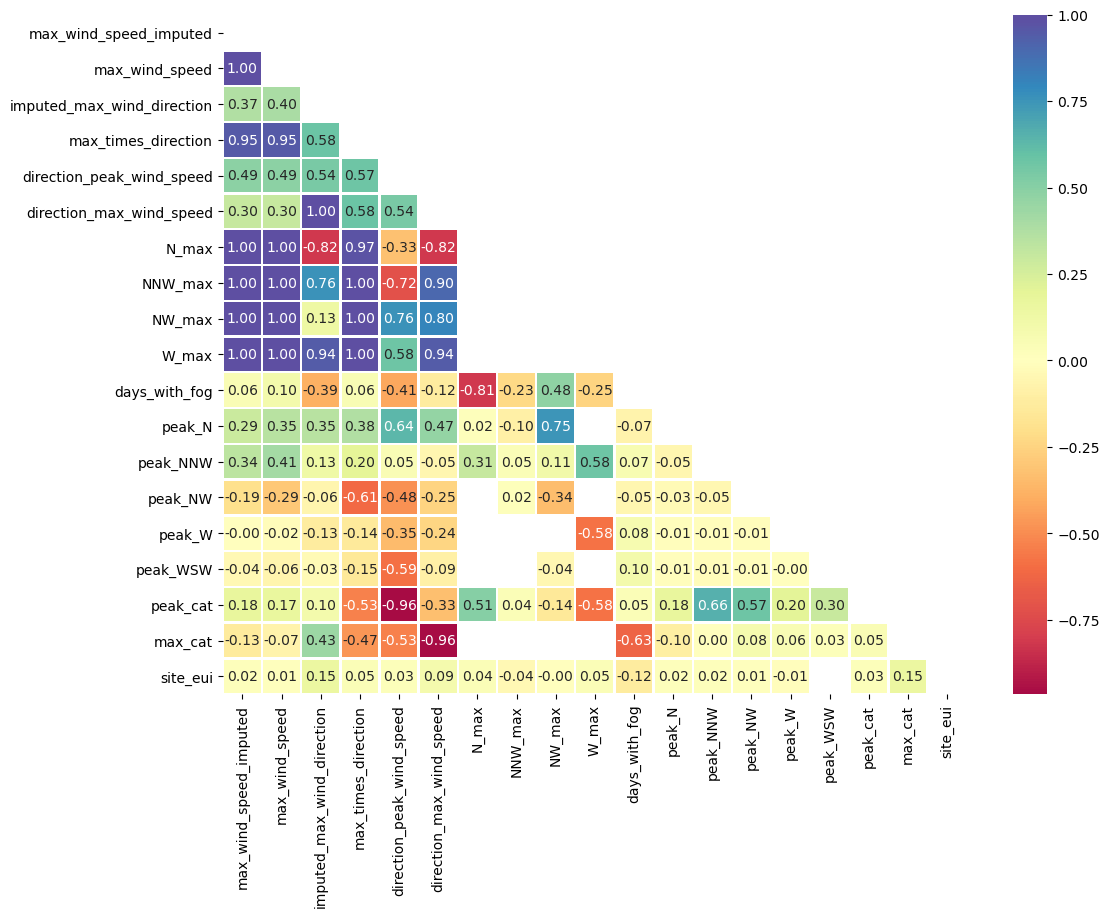

In [109]:
correlation = df[['max_wind_speed_imputed','max_wind_speed','imputed_max_wind_direction','max_times_direction','direction_peak_wind_speed','direction_max_wind_speed','days_with_fog','max_cat','site_eui']].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(12,9), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "Spectral", center=0, linewidths=1, fmt=".2f",annot=True)

In [110]:
df[['imputed_max_wind_direction','days_with_fog','max_wind_speed','max_wind_speed_imputed']].isna().sum()

imputed_max_wind_direction        0
days_with_fog                     0
max_wind_speed                53349
max_wind_speed_imputed         1038
dtype: int64

In [111]:
df_wind_fog = df.copy()

In [112]:
df_wind_fog = df_wind_fog[['days_with_fog','imputed_max_wind_direction']]

In [113]:
df_wind_fog

,days_with_fog,imputed_max_wind_direction
id,,
0,12.0,295.000000
1,12.0,295.000000
2,12.0,295.000000
3,12.0,295.000000
4,12.0,295.000000
...,...,...
85457,250.0,297.832817
85458,250.0,297.832817
85459,250.0,297.832817


In [114]:
fog = df_wind_fog['days_with_fog'].to_list()

In [115]:
max_wind_direction = df_wind_fog['imputed_max_wind_direction'].to_list()

In [116]:
fog[0:5]

[12.0, 12.0, 12.0, 12.0, 12.0]

In [117]:
Rdf = pd.read_csv("C:/Users/Meyke/WiDS/data/features_data_0402_imputed_star_rating_and_generous_building_id.csv")
Rdf = Rdf.set_index('id')

del Rdf['Unnamed: 0']

#rename
Rdf.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,calc_eui_perc_off,binned_calc_eui,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75,weather_cluster
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,-0.068208,10,10,0.856815,3,245.522877,241.135162,0,0,7
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,-0.016720,1,1,-0.209475,2,27.609132,39.559542,0,0,3
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,-0.102134,1,1,-0.218145,2,23.481589,100.965937,1,1,3
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,-0.155260,2,2,-0.104341,2,43.272466,69.441531,0,0,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,0.255951,1,1,-0.317939,2,5.196438,38.209399,1,1,7


In [120]:
Rdf['days_with_fog']

id
0         0.0
1        12.0
2        12.0
3        12.0
4         0.0
         ... 
85457     0.0
85458     0.0
85459     0.0
85460     0.0
85461     0.0
Name: days_with_fog, Length: 85462, dtype: float64

In [122]:
#Rdf.columns.to_list()

In [121]:
del Rdf['days_with_fog']

In [123]:
Rdf['days_with_fog'] = fog

In [124]:
Rdf['imputed_max_wind_direction'] = max_wind_direction

In [126]:
Rdf.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75,weather_cluster,days_with_fog,imputed_max_wind_direction
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,10,0.856815,3,245.522877,241.135162,0,0,7,12.0,295.0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,1,-0.209475,2,27.609132,39.559542,0,0,3,12.0,295.0
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,1,-0.218145,2,23.481589,100.965937,1,1,3,12.0,295.0
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,2,-0.104341,2,43.272466,69.441531,0,0,3,12.0,295.0
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,1,-0.317939,2,5.196438,38.209399,1,1,7,12.0,295.0


In [127]:
Rdf.isna().sum().sort_values(ascending=False)

site_eui                      9705
state_factor                     0
number_august                    0
number_july                      0
number_june                      0
                              ... 
october_min_temp                 0
september_max_temp               0
september_avg_temp               0
september_min_temp               0
imputed_max_wind_direction       0
Length: 112, dtype: int64

In [128]:
Rdf.to_csv("C:/Users/Meyke/WiDS/data/features_data_0502_imputed_star_rating_and_generous_building_id.csv")